<center>
<h1>Lab 8_Case study on predicting Health Insurance Premiums
    </h1></center>

<div >
    <h1>About Dataset</h1>
</div>

---

The `insurance.csv` dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

- **Find dataset : https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction**

---

<div> 
    <h2>Importing modules for EDA</h2>
</div>

In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Reading the dataset
</div>

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Understand about data
</div>

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.sample(7)

,age,sex,bmi,children,smoker,region,expenses
819,33,female,35.5,0,yes,northwest,55135.40
653,45,female,36.3,2,no,southeast,8527.53
41,31,female,36.6,2,no,southeast,4949.76
283,55,female,32.4,1,no,northeast,11879.10
589,38,female,30.7,1,no,southeast,5976.83
576,22,male,26.8,0,no,southeast,1665.00
35,19,male,20.4,0,no,northwest,1625.43


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
duplicate_data=df[df.duplicated()]

In [10]:
duplicate_data

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [11]:
df=df.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [12]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [13]:
df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


#### Get the total male and female in the dataset

<Axes: xlabel='sex', ylabel='count'>

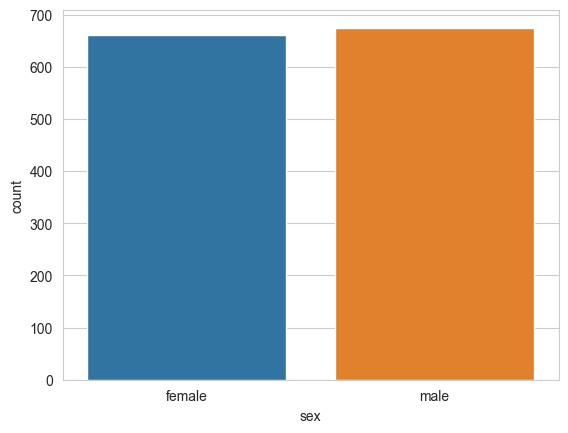

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=df)

#### Get the total no of people across the regions

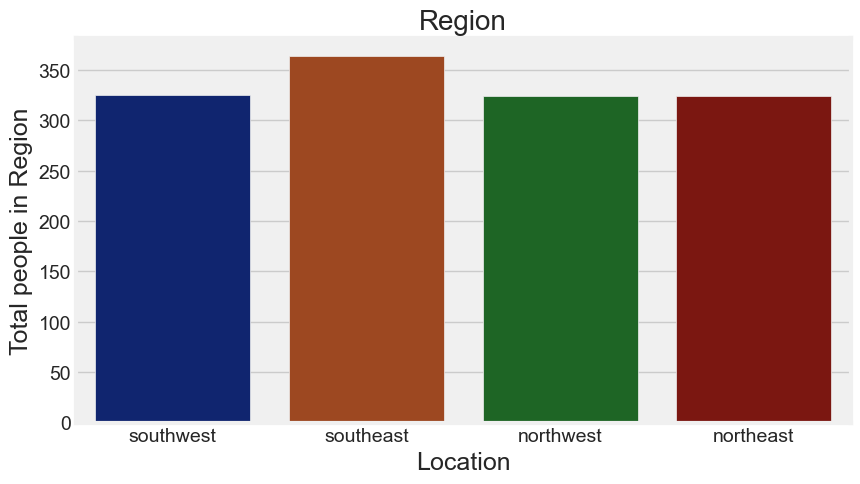

In [15]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
ax=sns.countplot(x='region',data=df,palette='dark',)
ax.set_xlabel(xlabel='Location',fontsize=18)
ax.set_ylabel(ylabel='Total people in Region',fontsize=18)
ax.set_title(label='Region',fontsize=20)
plt.show()

#### Average Expenses of Male and Female

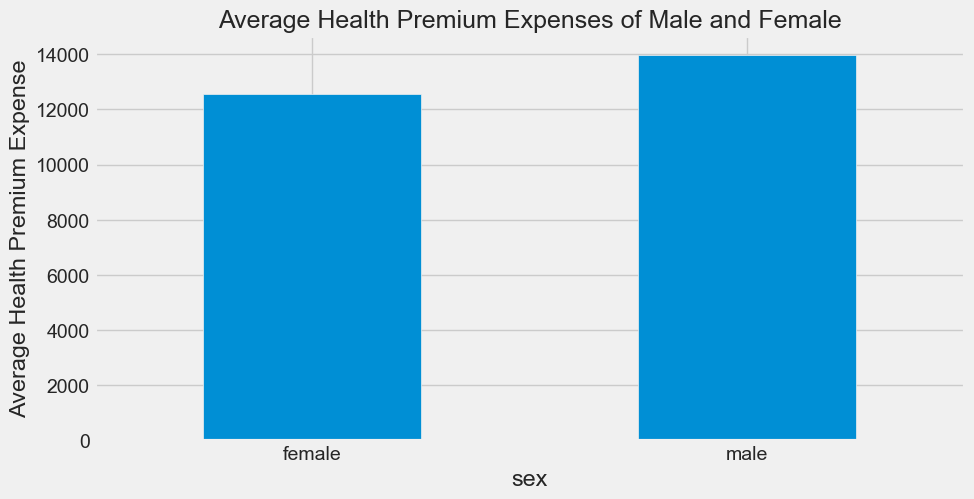

In [16]:
plt.figure(figsize=(10,5))
df.groupby(['sex'])['expenses'].mean().plot.bar()
plt.ylabel('Average Health Premium Expense')
plt.title("Average Health Premium Expenses of Male and Female",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

#### Average Expenses of a smoker and Non-smoker

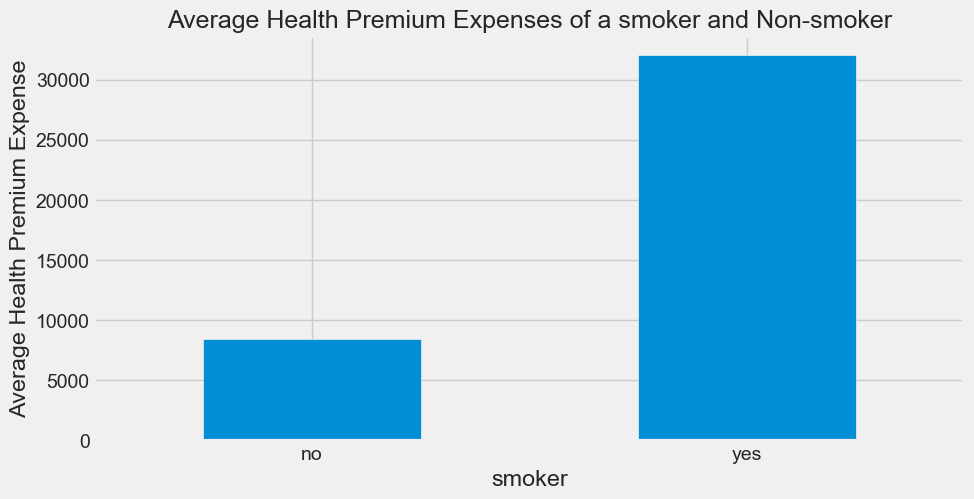

In [17]:
plt.figure(figsize=(10,5))
df.groupby(['smoker'])['expenses'].mean().plot.bar()
plt.ylabel('Average Health Premium Expense')
plt.title("Average Health Premium Expenses of a smoker and Non-smoker",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

#### Average Expenses of people of different region

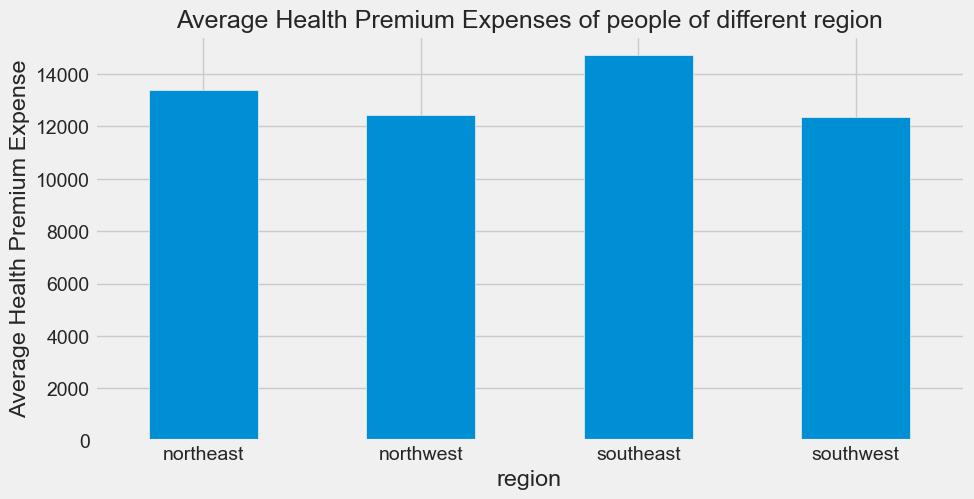

In [18]:
plt.figure(figsize=(10,5))
df.groupby(['region'])['expenses'].mean().plot.bar()
plt.ylabel('Average Health Premium Expense')
plt.title("Average Health Premium Expenses of people of different region",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

In [19]:
df1 = df[["age","bmi","children","expenses"]]
df1

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [20]:
df1.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


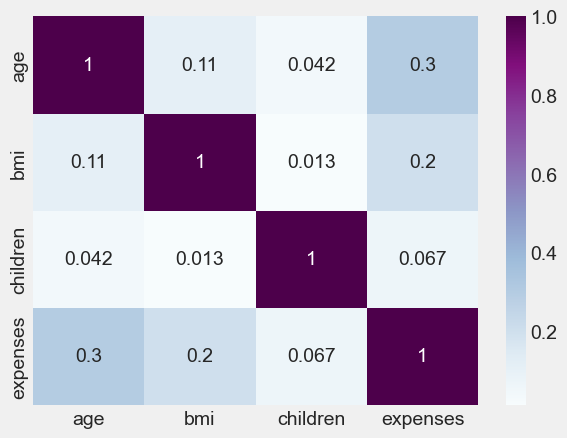

In [21]:
# correlation plot
corr = df1.corr()
sns.heatmap(corr, cmap = 'BuPu', annot= True);

There seems to be good relation between **age** and **bmi** with **expenses**.

Text(0.5, 1.0, 'Scatter plot of Premium Charges vs bmi')

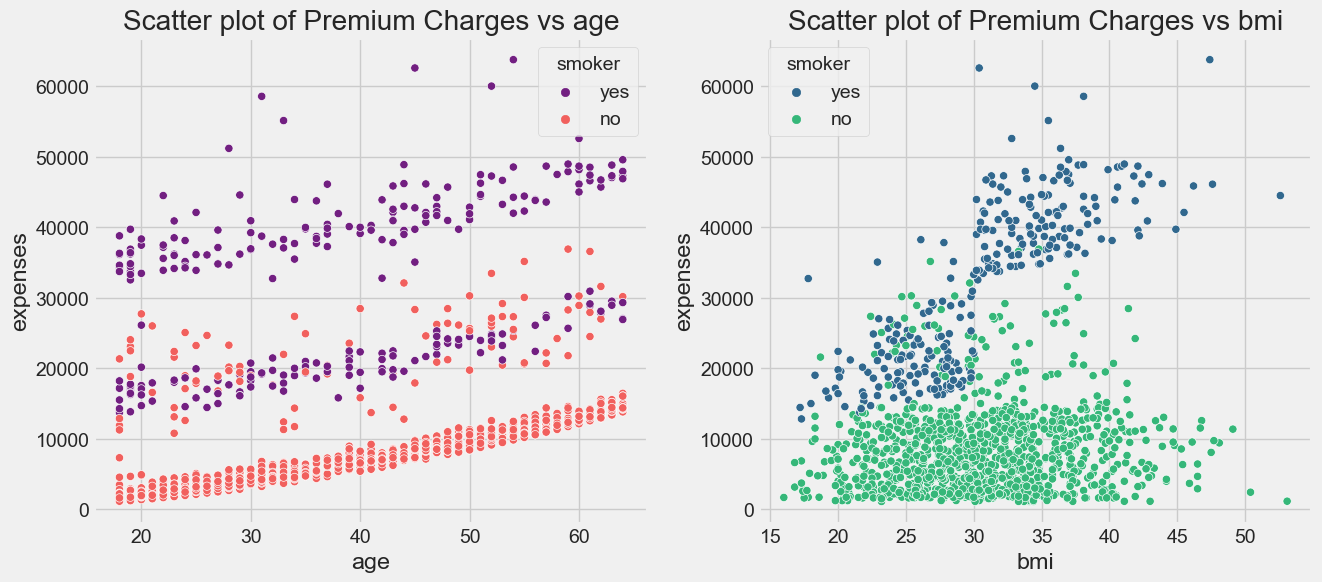

In [22]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Premium Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Premium Charges vs bmi')

As can be seen above, the continous columns of Age and Bmi are compared with expenses and it can be found that the smoker expenses are higher in comparison to non smokers.

C:\Users\AbdulAziz\anaconda3\envs\env_face\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Scatter plot of Charges vs age')

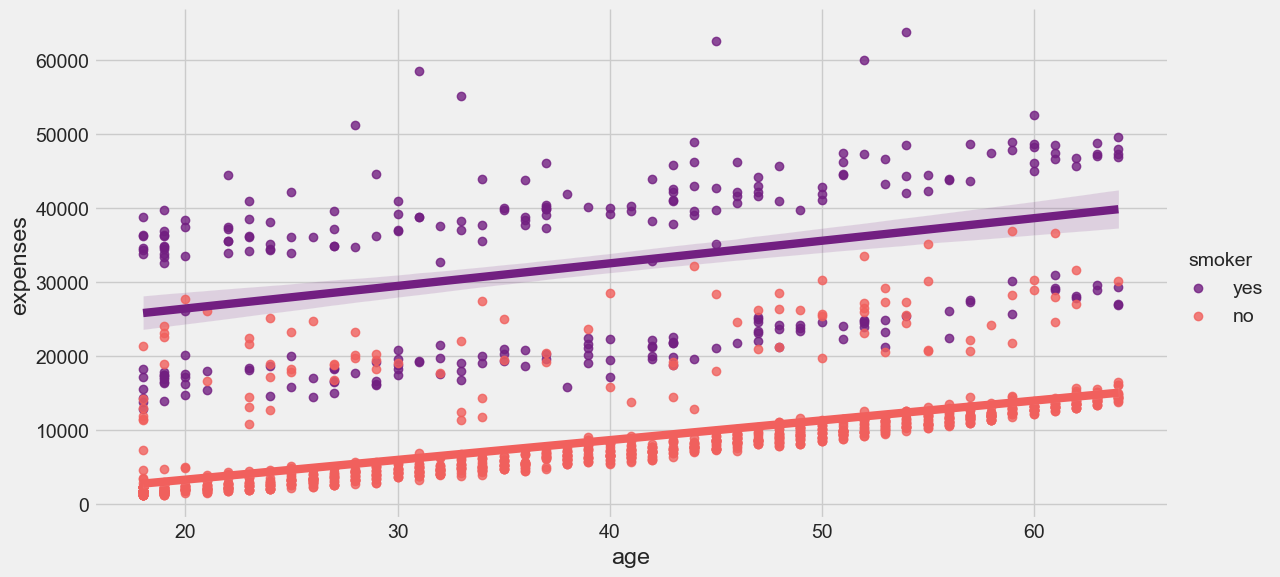

In [23]:
sns.lmplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',aspect=2,height=6)
ax.set_title('Scatter plot of Charges vs age')

C:\Users\AbdulAziz\anaconda3\envs\env_face\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

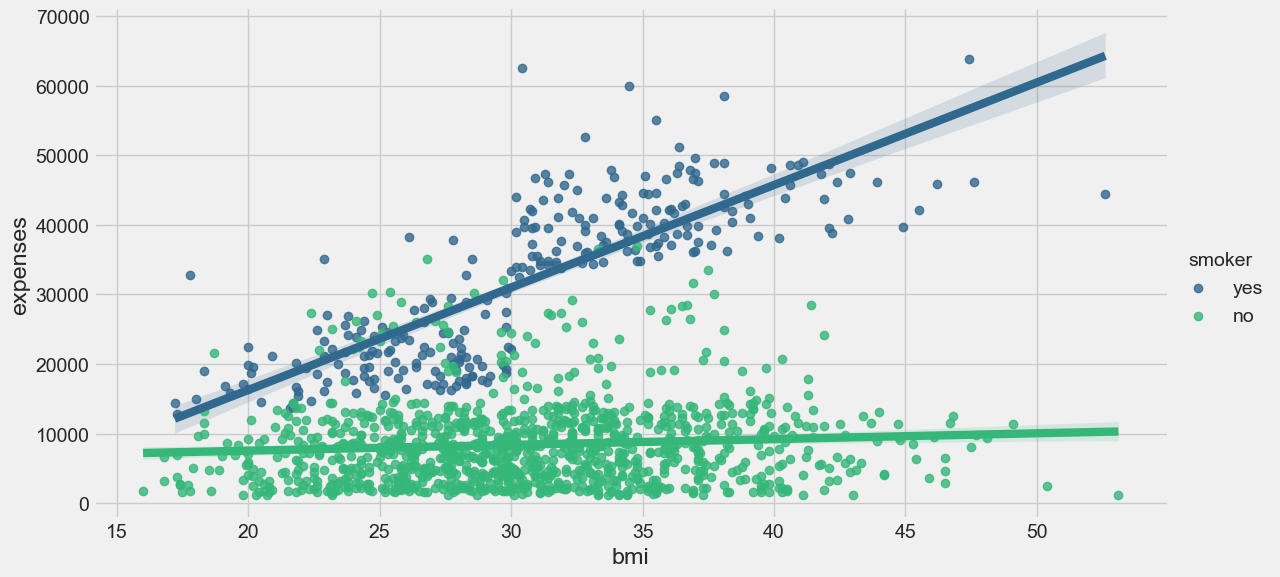

In [24]:
sns.lmplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker',aspect=2,height=6)
ax.set_title('Scatter plot of Charges vs bmi')

As can be seen above, the continous columns of Age and Bmi are compared with expenses and it can be found that the smoker expenses are higher in comparison to non smokers.

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Feature Engineering: Transform the Categorical features into nmerical features 👷
</div>

In [25]:
# Dummy variable
categorical_columns = ['sex','smoker','region']
df = pd.get_dummies(data = df,
               columns = categorical_columns,
                    drop_first = True
               )


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   expenses          1337 non-null   float64
 4   sex_male          1337 non-null   bool   
 5   smoker_yes        1337 non-null   bool   
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 58.8 KB


In [27]:
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


In [28]:
df.sex_male = df.sex_male.replace({True: 1, False: 0})
df.smoker_yes = df.smoker_yes.replace({True: 1, False: 0})
df.region_northwest = df.region_northwest.replace({True: 1, False: 0})
df.region_southeast = df.region_southeast.replace({True: 1, False: 0})
df.region_southwest = df.region_southwest.replace({True: 1, False: 0})

In [29]:
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [30]:
df.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638,0.504862,0.204936,0.242334,0.272251,0.243082
std,14.044333,6.100664,1.205571,12110.359657,0.500163,0.403806,0.428655,0.445285,0.429104
min,18.000000,16.000000,0.000000,1121.870000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.300000,0.000000,4746.340000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.160000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.720000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.100000,5.000000,63770.430000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   expenses          1337 non-null   float64
 4   sex_male          1337 non-null   int64  
 5   smoker_yes        1337 non-null   int64  
 6   region_northwest  1337 non-null   int64  
 7   region_southeast  1337 non-null   int64  
 8   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 104.5 KB



<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Feature Scaling: Transform the the continous data (numerical data) <br>onto the same scale of (0,1).
</div>

In [32]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[['age','bmi']]=scaler.fit_transform(df[['age','bmi']])

In [33]:
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.320755,0,16884.92,0,1,0,0,1
1,0.000000,0.479784,1,1725.55,1,0,0,1,0
2,0.217391,0.458221,3,4449.46,1,0,0,1,0
3,0.326087,0.180593,0,21984.47,1,0,1,0,0
4,0.304348,0.347709,0,3866.86,1,0,1,0,0


In [34]:
X=df.drop(columns=['expenses'],axis=1) # collecting only the features.

In [35]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.320755,0,0,1,0,0,1
1,0.000000,0.479784,1,1,0,0,1,0
2,0.217391,0.458221,3,1,0,0,1,0
3,0.326087,0.180593,0,1,0,1,0,0
4,0.304348,0.347709,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.404313,3,1,0,1,0,0
1334,0.000000,0.428571,0,0,0,0,0,0
1335,0.000000,0.563342,0,0,0,0,1,0
1336,0.065217,0.264151,0,0,0,0,0,1


In [36]:
y=df['expenses'] # collecting Label values
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Splitting the required data into training and test dataset.
</div>

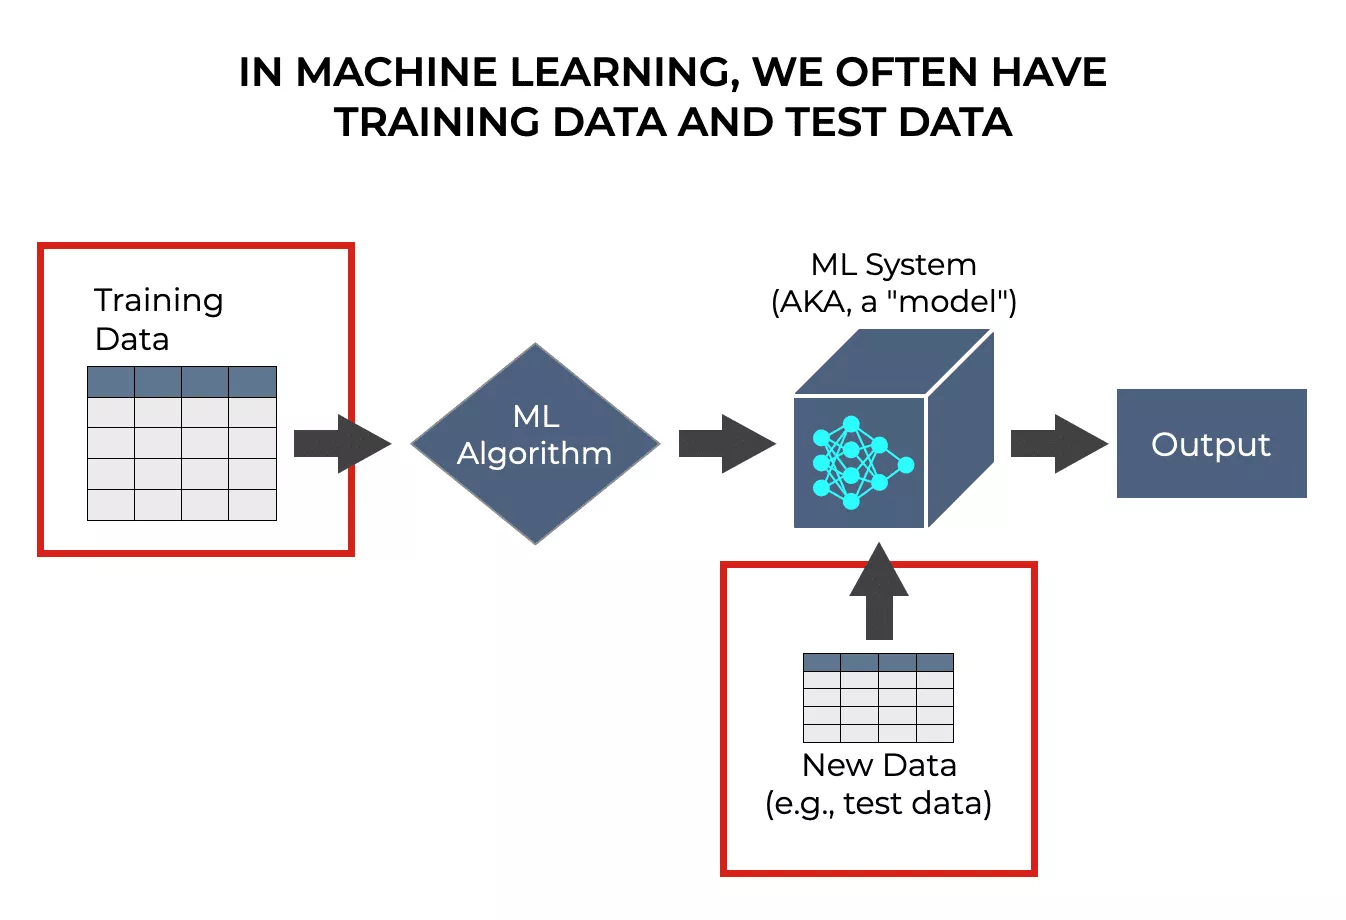

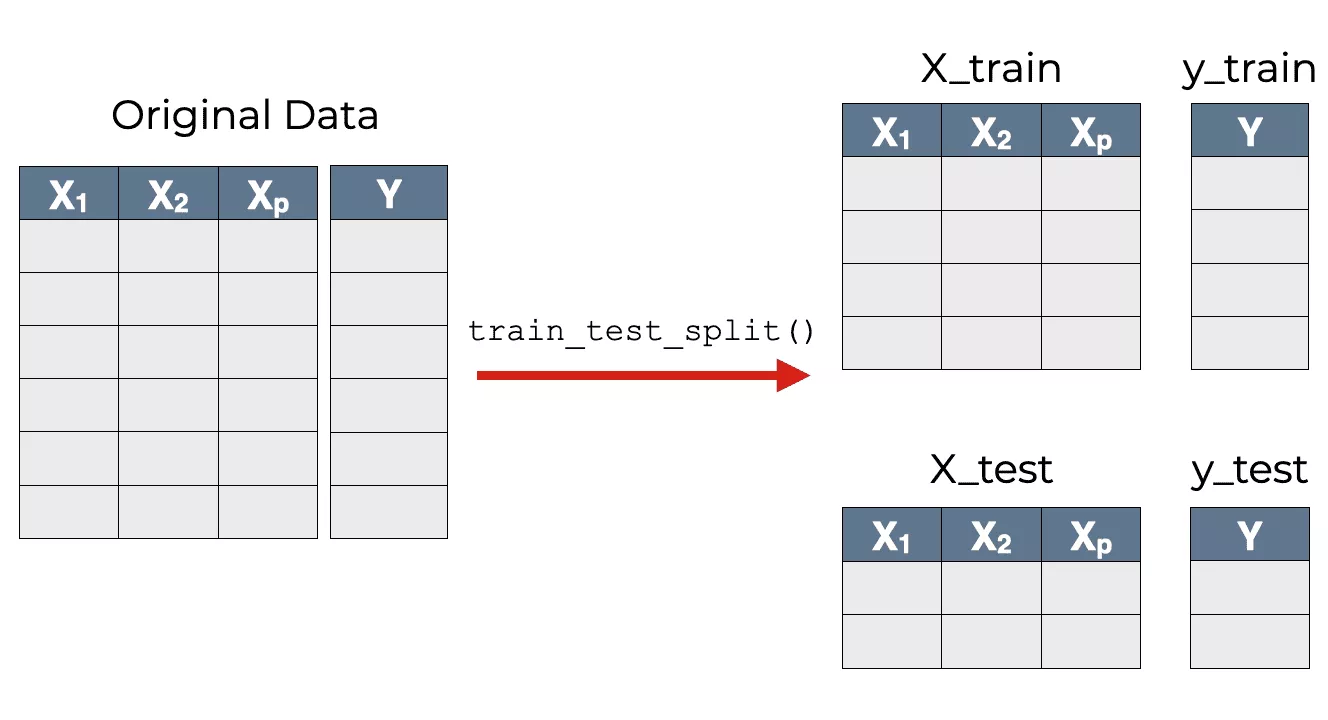

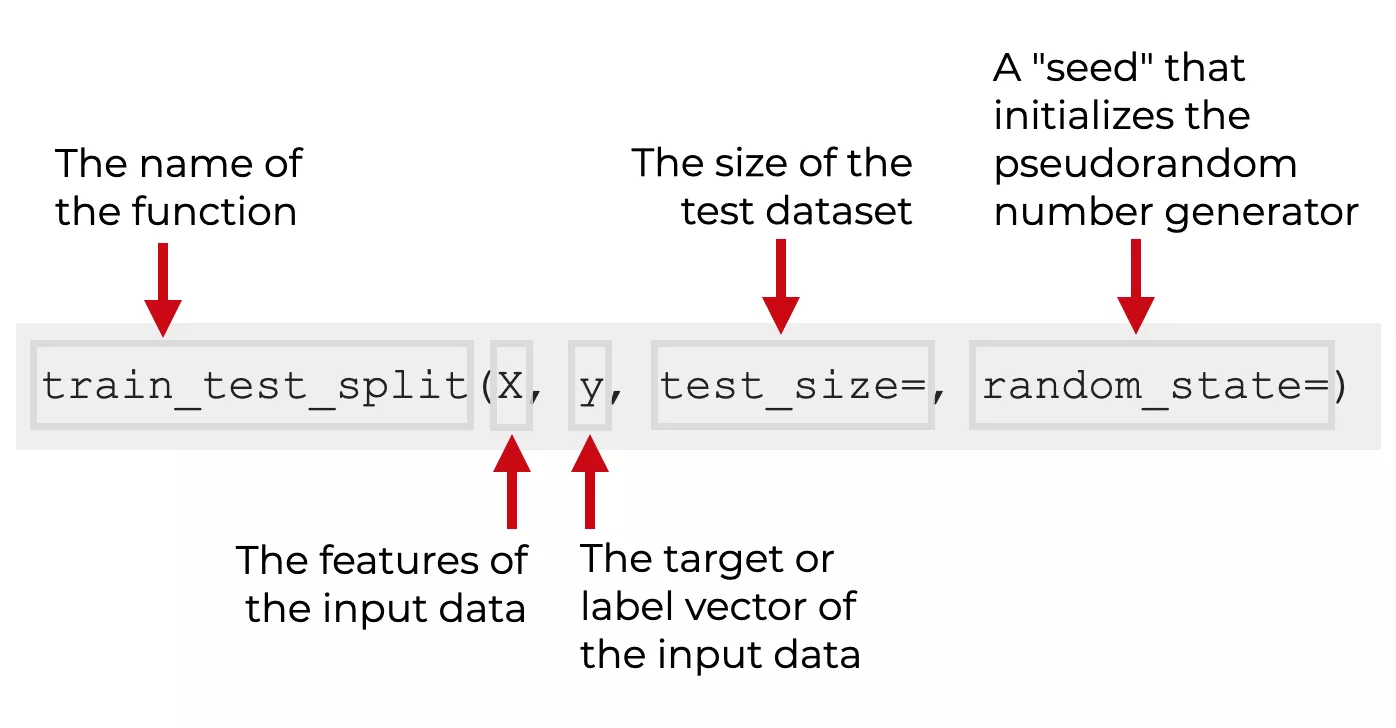

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)

In [38]:
print("X_train.shape=", X_train.shape)
print("y_train.shape=", y_train.shape)
print("X_test.shape=", X_test.shape)
print("y_test.shape=", y_test.shape)

X_train.shape= (935, 8)
y_train.shape= (935,)
X_test.shape= (402, 8)
y_test.shape= (402,)


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply LinearRegression.
</div>

In [39]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred_LR = lin_reg.predict(X_test) 

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse_LR = mean_squared_error(y_pred_LR, y_test)

# R_square
R_square_LR = lin_reg.score(X_test,y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',mse_LR)
print('R square obtain for scikit learn library is :',R_square_LR)

The Mean Square Error(MSE) or J(theta) is:  39947908.84008535
R square obtain for scikit learn library is : 0.7457169785897422


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply Supeort Vector Machine-Regression.
</div>

In [40]:
# Support Vector Machine's 
from sklearn.svm import SVR

SVM_R = SVR(kernel='rbf')
SVM_R.fit(X_train, y_train)

y_pred_svm = SVM_R.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse_svm = mean_squared_error(y_pred_svm, y_test)

# R_square
R_square_svm = SVM_R.score(X_test,y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',mse_svm)
print('R square obtain for scikit learn library is :',R_square_svm)

The Mean Square Error(MSE) or J(theta) is:  175424431.53693995
R square obtain for scikit learn library is : -0.1166405395325496


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply Decission Tree Regression.
</div>

In [41]:
# Scikit Learn module
from sklearn.tree import DecisionTreeRegressor
Dec_Tree_Reg = DecisionTreeRegressor(max_depth=4, min_samples_split=20)
Dec_Tree_Reg.fit(X_train, y_train)

y_pred = Dec_Tree_Reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse_Dec_Tree_Rege = mean_squared_error(y_pred, y_test)

# R_square
R_square_Dec_Tree_Rege = Dec_Tree_Reg.score(X_test,y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',mse_Dec_Tree_Rege)
print('R square obtain for scikit learn library is :',R_square_Dec_Tree_Rege)


The Mean Square Error(MSE) or J(theta) is:  25330988.97254493
R square obtain for scikit learn library is : 0.8387590089625606


In [43]:
R_square = [R_square_LR,R_square_svm,R_square_Dec_Tree_Rege]
models = ['Linear Regression', 'Support Vector Machine', 'Decission Tree']

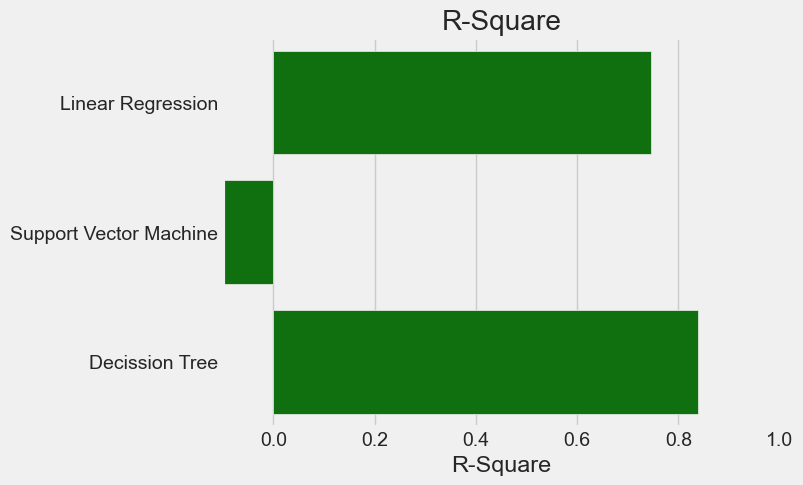

In [44]:
sns.barplot(x=R_square, y=models, color="g")
plt.xlim([-0.1,1.0])
plt.xlabel('R-Square')
plt.title('R-Square')
plt.show()

It is found that the R-Square value is highest for the Decission Tree compared to all other.

Thus Decission Tree are seems to be the best for this data.

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Save Decission Tree Model by using Pickel.
</div>

In [45]:
import pickle

In [46]:
# save the model to disk
filename = 'DTfinalized_model.sav'
pickle.dump(Dec_Tree_Reg, open(filename, 'wb'))

In [47]:
# Load the Model back from file
with open(filename, 'rb') as file:  
    DT_Model = pickle.load(file)

DT_Model

DecisionTreeRegressor(max_depth=4, min_samples_split=20)

In [48]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = DT_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = DT_Model.predict(X_test)  

Ypredict

Test score: 83.88 %


array([16614.33090909,  7074.4306    ,  2740.40173913, 13527.50105634,
        2740.40173913, 45206.73025   , 13527.50105634, 39427.96484848,
       36031.6428    ,  9720.87506494,  7074.4306    , 16614.33090909,
       13527.50105634, 13527.50105634,  2740.40173913, 16078.54457143,
        4697.34559524, 11203.65766667,  7074.4306    ,  7074.4306    ,
       13527.50105634, 13527.50105634, 16078.54457143, 13527.50105634,
       13527.50105634, 23492.26090909, 16614.33090909, 13527.50105634,
       13527.50105634,  4697.34559524, 11203.65766667, 11203.65766667,
        9720.87506494, 16614.33090909,  9720.87506494, 19035.46380952,
        2740.40173913,  7074.4306    ,  4697.34559524, 36031.6428    ,
        7074.4306    , 13527.50105634,  9720.87506494, 16078.54457143,
       11203.65766667,  7074.4306    ,  9720.87506494,  4697.34559524,
       45206.73025   ,  9720.87506494,  2740.40173913,  4697.34559524,
        7074.4306    ,  7074.4306    ,  4697.34559524,  2740.40173913,
      

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
<p style="text-align: center;">Happy Learning 😀</p>
</div>